In [12]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler # Importamos el estandarizador
from sklearn.pipeline import Pipeline # Importamos el pipeline
import numpy as np

In [ ]:
# Cargar el archivo con el encabezado correcto (fila 5, índice 4)
file_path = "../data/raw/archivo 3/Reporte Cronicos ESE Oriente ABRIL 2023.parquet"
try:
    df = pd.read_parquet(file_path)
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró. Asegúrate de que esté en la misma carpeta.")
    exit()



In [14]:
# Limpiar los nombres de las columnas para mayor facilidad de uso
df.columns = df.columns.str.strip()

# Seleccionar las variables de interés
var_sistolica = '25_tenartsis'
var_diastolica = '26_tenartditlica'

# Eliminar filas con valores faltantes y convertir las columnas a tipo numérico
df_clean = df[[var_sistolica, var_diastolica]].dropna()
df_clean[var_sistolica] = pd.to_numeric(df_clean[var_sistolica], errors='coerce')
df_clean[var_diastolica] = pd.to_numeric(df_clean[var_diastolica], errors='coerce')
df_clean.dropna(inplace=True)

# Definir las variables para el modelo
X = df_clean[[var_sistolica]]
y = df_clean[var_diastolica]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("¡Datos cargados y preparados exitosamente!")
print("\nConjunto de entrenamiento:", X_train.shape[0], "filas")
print("Conjunto de prueba:", X_test.shape[0], "filas")

¡Datos cargados y preparados exitosamente!

Conjunto de entrenamiento: 34552 filas
Conjunto de prueba: 8639 filas


In [15]:
# Creamos un pipeline que primero estandariza los datos y luego aplica la regresión lineal
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Entrenamos el pipeline completo. Esto entrena tanto el escalador como el modelo.
pipeline.fit(X_train, y_train)

print("¡Pipeline de estandarización y modelo de regresión lineal entrenado!")

¡Pipeline de estandarización y modelo de regresión lineal entrenado!



--- Evaluación del Modelo ---
Error Cuadrático Medio (MSE): 47.64
Raíz del Error Cuadrático Medio (RMSE): 6.90 mmHg
Coeficiente de Determinación (R^2): 0.44


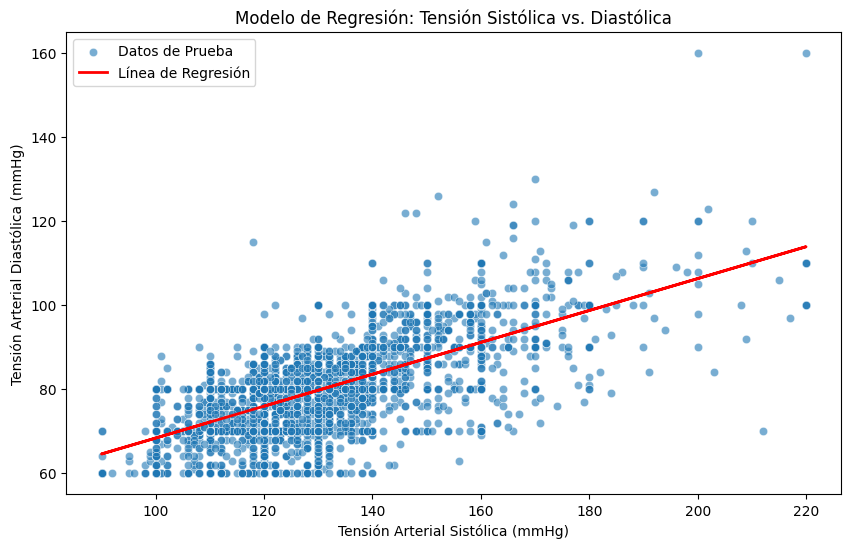

In [16]:
# Realizar predicciones con el pipeline
y_pred = pipeline.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n--- Evaluación del Modelo ---")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f} mmHg")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

# Visualizar la línea de regresión sobre los datos de prueba
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[var_sistolica], y=y_test, alpha=0.6, label='Datos de Prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Modelo de Regresión: Tensión Sistólica vs. Diastólica')
plt.xlabel('Tensión Arterial Sistólica (mmHg)')
plt.ylabel('Tensión Arterial Diastólica (mmHg)')
plt.legend()
plt.savefig('regresion_pipeline.png')
plt.show()

# Prueba git